In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Principal Component Analysis (PCA)

In [2]:
%pylab inline
import numpy.matlib
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [3]:
mycolors = ListedColormap(['#830000', '#3e9f3e', '#003366'])

## The Adidas problem

### Draw random samples from multivariate Gaussian probability density functions

In [4]:
N = 500
x1, x2 = numpy.random.multivariate_normal([0, 0], [[50, 0], [0, .5]], N).T
x1 = np.append(np.append(x1, x1), x1)
x2 = np.append(np.append(x2, x2 + 7), x2 - 7)

In [5]:
# alternative: 3 independent Gaussian pdfs
if True:
    x1a, x2a = numpy.random.multivariate_normal([0,  0], [[50, 0], [0, .5]], N).T
    x1b, x2b = numpy.random.multivariate_normal([0, +7], [[50, 0], [0, .5]], N).T
    x1c, x2c = numpy.random.multivariate_normal([0, -7], [[50, 0], [0, .5]], N).T
    x1 = np.append(np.append(x1a, x1b), x1c)
    x2 = np.append(np.append(x2a, x2b), x2c)    

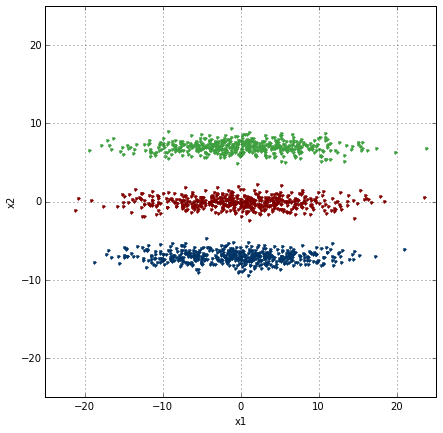

In [6]:
figure(figsize(7, 7))
plt.plot(x1[0:N], x2[0:N], '.', color=mycolors.colors[0])
plt.plot(x1[N:2*N], x2[N:2*N], '.', color=mycolors.colors[1])
plt.plot(x1[2*N:3*N], x2[2*N:3*N], '.', color=mycolors.colors[2])
plt.xlim([-25, 25]), plt.ylim([-25, 25])
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

In [7]:
alpha = 30.0 * pi / 180
R = np.array([[cos(alpha), -sin(alpha)], [sin(alpha), cos(alpha)]])
data = (np.r_['0,2', x1, x2])
data = np.dot(R, data) + numpy.matlib.repmat(np.array([[20], [25]]), 1, 3*N)

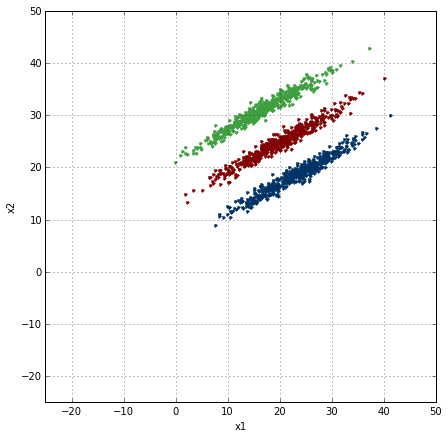

In [8]:
figure(figsize(7, 7))
plt.plot(data[0, 0:N], data[1, 0:N], '.', color=mycolors.colors[0])
plt.plot(data[0, N:2*N], data[1, N:2*N], '.', color=mycolors.colors[1])
plt.plot(data[0, 2*N:3*N], data[1, 2*N:3*N], '.', color=mycolors.colors[2])
plt.xlim([-25, 50]), plt.ylim([-25, 50])
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

### Compute PCA

#### Subtract the mean vector

In [9]:
avg = data.sum(1) / len(data[0])
avg = np.array([avg]).T # create a column vector
avg

array([[ 19.71865273],
       [ 24.8240642 ]])

In [10]:
data_zeromean = data - numpy.matlib.repmat(avg, 1, len(data[0]))

#### Compute the covariance matrix

In [11]:
cov = zeros([2, 2])
for i in range(3*N):
    x = data_zeromean[:,i]
    x = np.array([x]).T # create a column vector
    cov += x * x.T
cov /= (len(data_zeromean[0]) - 1)

In [12]:
cov

array([[ 42.52426557,   6.68003838],
       [  6.68003838,  38.08815341]])

#### Solve the eigenvalue/-vector problem using SVD

In [13]:
u, s, v = numpy.linalg.svd(data_zeromean, full_matrices=False)

In [14]:
print('Size of u: {0} x {1}'.format(len(u), len(u[0])))
print('Size of s: {0}'.format(len(s)))
print('Size of v: {0} x {1}'.format(len(v), len(v[0])))

Size of u: 2 x 2
Size of s: 2
Size of v: 2 x 1500


In [15]:
# sanity check
np.allclose(data_zeromean, np.dot(u, np.dot(np.diag(s), v)))

True

#### Transform the data

In [16]:
data_pca = np.dot(u.T, data_zeromean)

#### Visualization

In [17]:
def cov_ellipse(data):
    mean = np.mean(data, 1)
    cov = np.cov(data)
    a1 = sqrt(cov[0, 0]);
    a3 = cov[0, 1] / a1;
    a2 = sqrt(cov[1, 1] - a3*a3);
    t = linspace(0, 2*pi, 101)
    x1 = a1 * cos(t) + mean[0]
    x2 = a3 * cos(t) + a2 * sin(t) + mean[1]
    return np.r_['0,2', x1, x2]

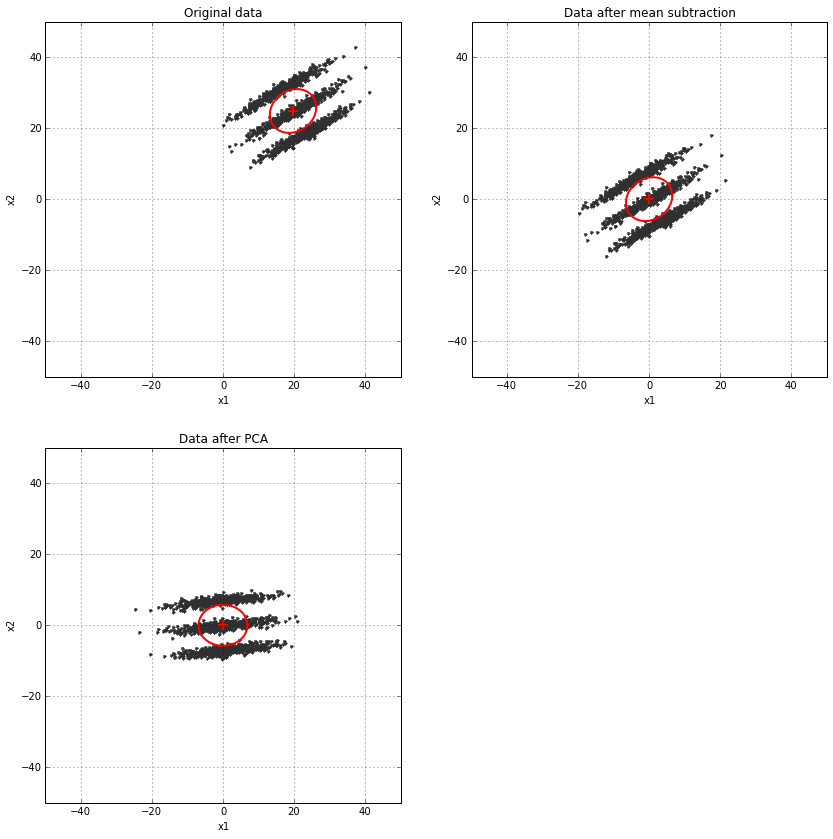

In [18]:
captions= ['Original data', 'Data after mean subtraction', 'Data after PCA']
figure(figsize(14,14))
col_samples = '#303030'
col_cov = 'red'
for i, array_name in enumerate(['data', 'data_zeromean', 'data_pca']):
    array = locals()[array_name]
    plt.subplot(2, 2, i+1)
    plt.plot(array[0], array[1], '.', c=col_samples)
    plt.xlim([-50,50]), plt.ylim([-50,50])
    plt.xlabel('x1'), plt.ylabel('x2')    
    plt.title(captions[i])
    plt.grid()
    mean = np.mean(array, 1)
    plt.plot(mean[0], mean[1], '+', markersize=10, markeredgewidth=2, c=col_cov)
    ellipse = cov_ellipse(array)
    plt.plot(ellipse[0], ellipse[1], c=col_cov, linewidth=2)